In [1]:
import pandas as pd


In [2]:
train = pd.read_csv("/home/ankan/project/spooky_kaggle/train.csv")

In [3]:
train.head(5)


,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [4]:
print(train.shape)

(19579, 3)


In [5]:
eap = train[train.author=='EAP']['text'].values

In [6]:
hpl = train[train.author=='HPL']['text'].values

In [7]:
mws = train[train.author=='MWS']['text'].values

In [9]:
import nltk

In [10]:
first_text = train.text.values[0]

In [11]:
print(first_text)
print('='*90)
print(first_text.split(" "))

This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.
['This', 'process,', 'however,', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon;', 'as', 'I', 'might', 'make', 'its', 'circuit,', 'and', 'return', 'to', 'the', 'point', 'whence', 'I', 'set', 'out,', 'without', 'being', 'aware', 'of', 'the', 'fact;', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wall.']


In [12]:
first_text_list = nltk.word_tokenize(first_text)
print(first_text_list)

['This', 'process', ',', 'however', ',', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon', ';', 'as', 'I', 'might', 'make', 'its', 'circuit', ',', 'and', 'return', 'to', 'the', 'point', 'whence', 'I', 'set', 'out', ',', 'without', 'being', 'aware', 'of', 'the', 'fact', ';', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wall', '.']


In [13]:
stopwords = nltk.corpus.stopwords.words('english')

In [14]:
len(stopwords)

179

In [15]:
first_text_list_cleaned = [word for word in first_text_list if word not in stopwords]

In [17]:
print(first_text_list_cleaned)
print('='*90)
print("Before stopwords removal word count: {0}\n"
     "After stopwords removal word count: {1}".format(len(first_text_list),len(first_text_list_cleaned)))

['This', 'process', ',', 'however', ',', 'afforded', 'means', 'ascertaining', 'dimensions', 'dungeon', ';', 'I', 'might', 'make', 'circuit', ',', 'return', 'point', 'whence', 'I', 'set', ',', 'without', 'aware', 'fact', ';', 'perfectly', 'uniform', 'seemed', 'wall', '.']
Before stopwords removal word count: 48
After stopwords removal word count: 31


In [19]:
stemmer = nltk.stem.PorterStemmer()
print("Stem word for running: {0}".format(stemmer.stem('running')))

Stem word for running: run


In [21]:
lemm =nltk.stem.WordNetLemmatizer()
print("Lemm word for leaves: {0}".format(lemm.lemmatize('leaves')))

Lemm word for leaves: leaf


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
sentence = ["I love to eat Burgers", 
            "I love to eat Fries"]
vectorizer = CountVectorizer(min_df = 0)
sentence_transform = vectorizer.fit_transform(sentence)

In [32]:
print("features: \n {}".format(sentence_transform.toarray()))


features: 
 [[1 1 0 1 1]
 [0 1 1 1 1]]


In [33]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [34]:
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [35]:
text = list(train.text.values)
tf_vectorizer = LemmaCountVectorizer(max_df=0.95,
                                    min_df=2,
                                    stop_words='english',
                                    decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)

In [38]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)


In [39]:
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=11, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [40]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:mean night fact young return great human looking wonder countenance difficulty greater wife finally set possessed regard struck perceived act society law health key fearful mr exceedingly evidence carried home write lady various recall accident force poet neck conduct investigation

Topic #1:death love raymond hope heart word child went time good man ground evil long misery replied filled passion bed till happiness memory heavy region year escape spirit grief visit doe story beauty die plague making influence thou letter appeared power

Topic #2:left let hand said took say little length body air secret gave right having great arm thousand character minute foot true self gentleman pleasure box clock discovered point sought pain nearly case best mere course manner balloon fear head going

Topic #3:called sense table suddenly sympathy machine sens unusual labour thrown mist solution suppose specie movement whispered urged frequent wine hour appears ring tu

In [41]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]
fourth_topic = lda.components_[3]

In [44]:
from wordcloud import WordCloud, STOPWORDS

In [45]:
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]
fourth_topic_words = [tf_feature_names[i] for i in fourth_topic.argsort()[:-50 - 1 :-1]]

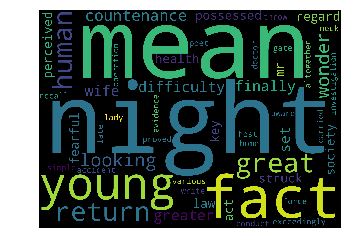

In [47]:
import matplotlib.pyplot as plt
firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

class LemmaTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaTfidfVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

tfidf_vectorizer =LemmaTfidfVectorizer(max_df=0.95, min_df=2, stop_words='english',decode_error='ignore' )
tfidf = tfidf_vectorizer.fit_transform(text) 


In [52]:
nmf = NMF(n_components=11,  max_iter=5, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')

In [53]:
nmf.fit(tfidf)

NMF(alpha=0.1, beta_loss='frobenius', init='nndsvd', l1_ratio=0.5, max_iter=5,
  n_components=11, random_state=1, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [55]:
first_topic_nmf = nmf.components_[0]
second_topic_nmf = nmf.components_[1]
third_topic_nmf = nmf.components_[2]
fourth_topic_nmf = nmf.components_[3]

first_topic_words_nmf = [tf_feature_names[i] for i in first_topic_nmf.argsort()[:-50 - 1 :-1]]

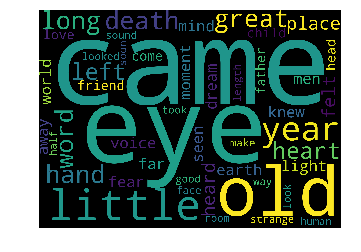

In [56]:
import matplotlib.pyplot as plt
firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words_nmf))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

